In [2]:
%clear #清空console

from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
import time



In [10]:
chang_path="D:/Python Basics/Class Data/"
os.chdir(chang_path)
Path=chang_path

In [11]:

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题



In [12]:

dataframe_new=pd.read_csv("CEO_Data.csv")


In [6]:
for i in dataframe_new[['Age','TotalSalary','Female','SharEnd', 'TMTP', 'IsDuality']]:
    dataframe_new[i]=np.where(dataframe_new[i].isnull(), np.nan, winsorize(np.ma.masked_invalid(dataframe_new[i]),limits=(0.01,0.01)))
#np.where(condition, x, y),满足condition是x，否则y

In [15]:
#%%
TotalSalary=dataframe_new.TotalSalary/10000


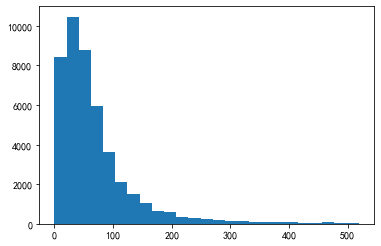

In [20]:

plt.hist(TotalSalary,bins=25,range=(TotalSalary.quantile(0.01),TotalSalary.quantile(0.99)))
plt.show()

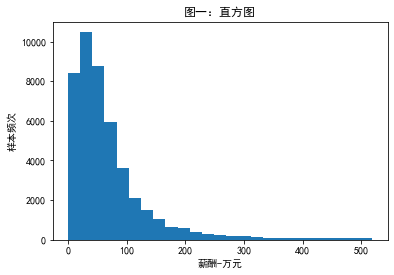

In [23]:
plt.title('图一：直方图')
plt.ylabel('样本频次')
plt.xlabel('薪酬-万元')
#plt.hist(TotalSalary,bins=25,alpha=0.7)
###直方图
plt.hist(TotalSalary,bins=25,range=(TotalSalary.quantile(0.01),TotalSalary.quantile(0.99)))
plt.savefig("薪酬直方图.png")
plt.show()

In [22]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


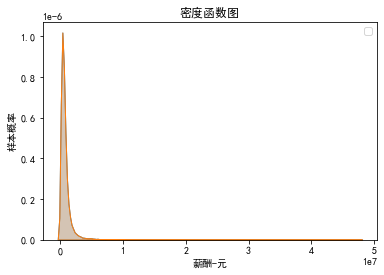

In [24]:
#%%
Save_Path=Path+"薪酬密度图.png"
TotalSalary=dataframe_new.TotalSalary
plt.title('密度函数图')
plt.ylabel('样本概率')
plt.xlabel('薪酬-元')
#sns.kdeplot(df['TotalSalary'],shade=True)
sns.kdeplot(TotalSalary,shade=True)
scatter_fig = sns.kdeplot(TotalSalary,shade=True).get_figure()
plt.legend()
scatter_fig.savefig(Save_Path)
plt.show()

In [27]:
df=dataframe_new

for i in df[['Age','TotalSalary','Female']]:
    print(i,type(i))

Age <class 'str'>
TotalSalary <class 'str'>
Female <class 'str'>


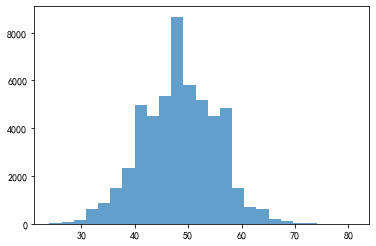

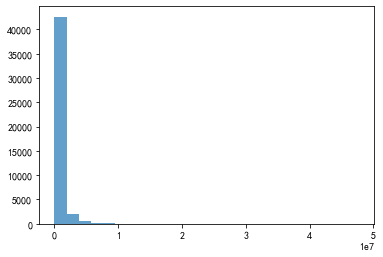

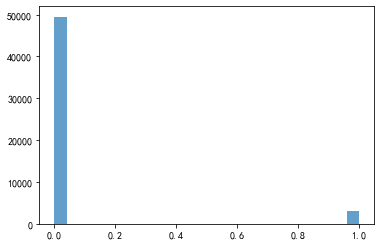

In [28]:

for i in df[['Age','TotalSalary','Female']]:
    Save_Path=Path+"Hist_"+i+".png"
    plt.hist(df[i],bins=25,alpha=0.7)
    plt.savefig(Save_Path)
    plt.show()
    #plt.title('概率密度图')
    #sns.kdeplot(df[i],shade=True)
    #plt.show()
    #scatter_fig = sns.kdeplot(df[i],shade=True).get_figure()
    #Save_Path=Path+"Density_"+i+".png"
    #scatter_fig.savefig(Save_Path)


D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


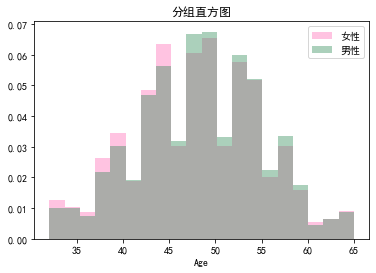

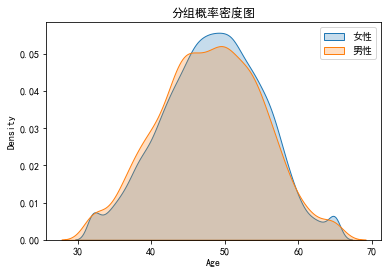

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


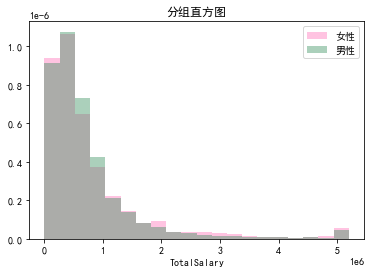

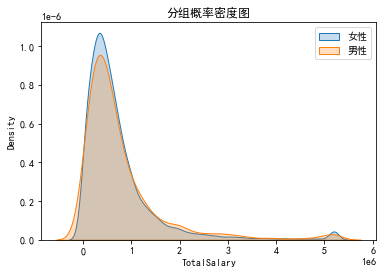

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


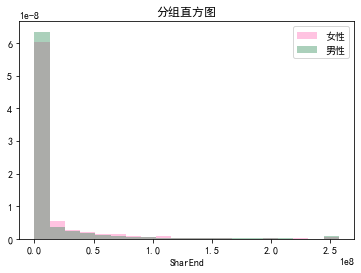

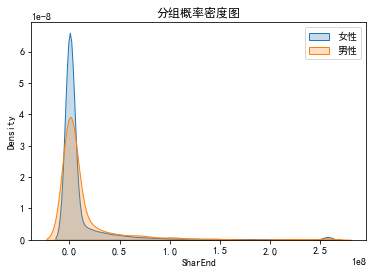

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


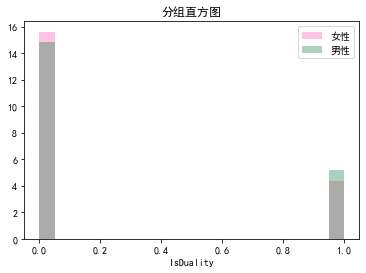

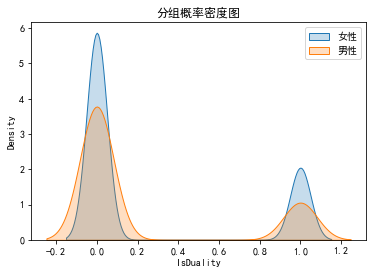

In [48]:

for i in df[['Age','TotalSalary','SharEnd', 'IsDuality']]:
    Save_Path=Path+"Group_Hist"+i+".png"
    plt.title('分组直方图')
    sns.distplot(df[df.Female==1][i],bins=20,kde=False,norm_hist=True,color='hotpink',label='女性')
    sns.distplot(df[df.Female==0][i],bins=20,kde=False,norm_hist=True,color='seagreen',label='男性')
    plt.legend()
    plt.savefig(Save_Path)
    plt.show()
    plt.title('分组概率密度图')
    sns.kdeplot(df[df.Female==0][i],label='女性',shade=True)
    sns.kdeplot(df[df.Female==1][i],label='男性',shade=True)
    plt.legend()
    plt.show()

D:\Software\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


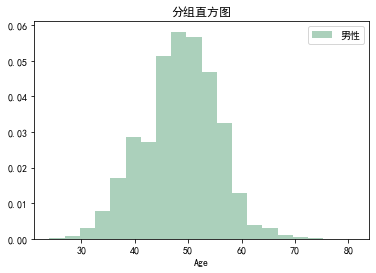

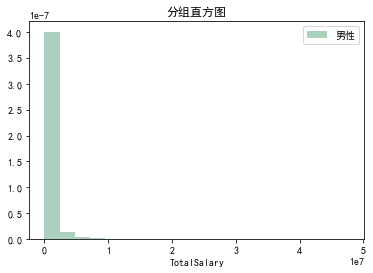

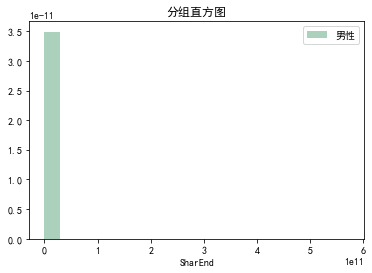

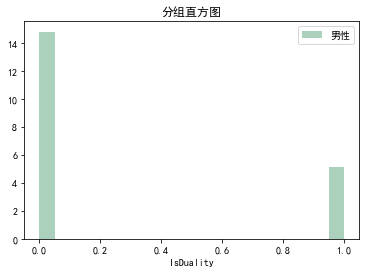

In [31]:

for i in df[['Age','TotalSalary','SharEnd', 'IsDuality']]:
    Save_Path=Path+"Group_Hist"+i+".png"
    plt.title('分组直方图')
    #sns.distplot(df[df.Female==1][i],bins=20,kde=False,norm_hist=True,color='hotpink',label='女性')
    sns.distplot(df[df.Female==0][i],bins=20,kde=False,norm_hist=True,color='seagreen',label='男性')
    plt.legend()
    plt.savefig(Save_Path)
    plt.show()


In [32]:
df=dataframe_new[['Age','TotalSalary','SharEnd', 'IsDuality','Reptdt','Female',]]
df['Year'] = df.apply(lambda x : int(x['Reptdt'][0:4]),axis=1) 
print(df['Year'][0:9])
print(df.head())


0    1999
1    2000
2    2001
3    2002
4    2003
5    2004
6    2005
7    2005
8    2006
Name: Year, dtype: int64
    Age  TotalSalary  SharEnd  IsDuality      Reptdt  Female  Year
0  48.0          NaN      0.0          0  1999-12-31       0  1999
1  49.0          NaN      0.0          0  2000-12-31       0  2000
2  50.0          NaN      0.0          0  2001-12-31       0  2001
3  51.0          NaN      0.0          0  2002-12-31       0  2002
4  40.0          NaN      0.0          0  2003-12-31       0  2003


C:\Users\xuyonghao\AppData\Local\Temp\ipykernel_22228\4228621047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.apply(lambda x : int(x['Reptdt'][0:4]),axis=1)


In [34]:


mean_by_year=df.groupby(['Year']).mean()
std_by_year=df.groupby(['Year']).std()
print(mean_by_year)


            Age   TotalSalary       SharEnd  IsDuality    Female
Year                                                            
1991  35.000000           NaN           NaN   0.500000  0.000000
1992  48.708333           NaN  1.994425e+04   0.444444  0.000000
1993  48.011628  0.000000e+00  8.494817e+03   0.482759  0.034483
1994  50.524390           NaN  2.026833e+04   0.578313  0.072289
1995  50.190476           NaN  5.300000e+03   0.476190  0.000000
1996  48.057692           NaN  1.039919e+04   0.566879  0.044586
1997  47.145455  1.350000e+04  1.085629e+04   0.461078  0.047904
1998  46.389474  1.464000e+04  7.810053e+03   0.200000  0.031579
1999  46.404018  4.831127e+04  1.672062e+04   0.230512  0.046771
2000  45.117395  5.817490e+04  1.181535e+05   0.160547  0.039283
2001  44.964052  7.009772e+04  7.284282e+04   0.124898  0.040816
2002  45.025562  9.120818e+04  1.859485e+05   0.109218  0.039504
2003  44.896604  1.170671e+05  2.830102e+05   0.113791  0.036925
2004  45.220083  1.524666

In [36]:
mean_by_year=mean_by_year.reset_index()


In [37]:
mean_by_year

,index,Year,Age,TotalSalary,SharEnd,IsDuality,Female
0,0,1991,35.000000,NaN,NaN,0.500000,0.000000
1,1,1992,48.708333,NaN,1.994425e+04,0.444444,0.000000
2,2,1993,48.011628,0.000000e+00,8.494817e+03,0.482759,0.034483
3,3,1994,50.524390,NaN,2.026833e+04,0.578313,0.072289
4,4,1995,50.190476,NaN,5.300000e+03,0.476190,0.000000
5,5,1996,48.057692,NaN,1.039919e+04,0.566879,0.044586
6,6,1997,47.145455,1.350000e+04,1.085629e+04,0.461078,0.047904
7,7,1998,46.389474,1.464000e+04,7.810053e+03,0.200000,0.031579
8,8,1999,46.404018,4.831127e+04,1.672062e+04,0.230512,0.046771
9,9,2000,45.117395,5.817490e+04,1.181535e+05,0.160547,0.039283


In [38]:
Condition=(mean_by_year.Year <=2006) #这里加不加括号都行，加了括号方便理解
index_condition = mean_by_year[Condition].index.tolist()
mean_by_year=mean_by_year.drop(index_condition) #删除2008年以前的

In [39]:
print(mean_by_year,type(mean_by_year))

    index  Year        Age   TotalSalary       SharEnd  IsDuality    Female
16     16  2007  46.342891  4.703536e+05  2.500750e+06   0.169654  0.051374
17     17  2008  46.756773  4.483589e+05  3.535726e+06   0.172556  0.054770
18     18  2009  47.068230  4.764950e+05  5.169039e+06   0.200426  0.055970
19     19  2010  47.380065  5.300185e+05  8.841238e+06   0.252026  0.062804
20     20  2011  47.631401  5.952699e+05  1.215515e+07   0.272967  0.066265
21     21  2012  48.328018  6.208741e+05  1.173385e+07   0.261200  0.064161
22     22  2013  48.816286  6.784719e+05  1.427261e+07   0.251770  0.062549
23     23  2014  49.093625  7.058825e+05  1.856819e+07   0.269119  0.058631
24     24  2015  49.338216  7.564300e+05  2.354754e+07   0.274301  0.059254
25     25  2016  49.607208  7.994321e+05  2.788997e+07   0.292550  0.064204
26     26  2017  49.823982  8.823116e+05  3.022072e+07   0.324366  0.059441
27     27  2018  50.343373  1.026406e+06  2.896994e+07   0.302217  0.066521
28     28  2

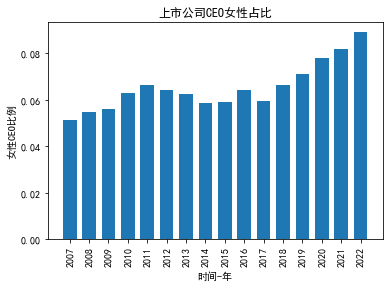

In [44]:
plt.title('上市公司CEO女性占比')
plt.ylabel('女性CEO比例')
plt.xlabel('时间-年')
plt.bar(mean_by_year.Year,mean_by_year.Female,width=0.7)
plt.xticks(mean_by_year.Year, mean_by_year.Year, rotation=90)
Save_Path=Path+"上市公司CEO女性占比.png"
plt.savefig(Save_Path)
plt.show()

In [46]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

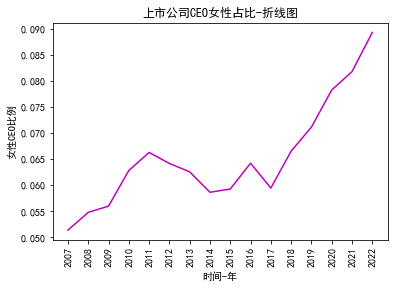

In [47]:
plt.title('上市公司CEO女性占比-折线图')
plt.ylabel('女性CEO比例')
plt.xlabel('时间-年')
plt.plot(mean_by_year.Year,mean_by_year.Female,color="m")
plt.xticks(mean_by_year.Year, mean_by_year.Year, rotation=90)
Save_Path=Path+"上市公司CEO女性占比-折线图.png"
plt.savefig(Save_Path)
plt.show()

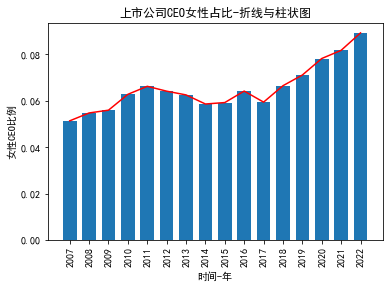

In [48]:
plt.title('上市公司CEO女性占比-折线与柱状图')
plt.ylabel('女性CEO比例')
plt.xlabel('时间-年')
plt.bar(mean_by_year.Year,mean_by_year.Female,width=0.7)
plt.plot(mean_by_year.Year,mean_by_year.Female,color="r")
plt.xticks(mean_by_year.Year, mean_by_year.Year, rotation=90)
Save_Path=Path+"上市公司CEO女性占比-折线与柱状图.png"
plt.savefig(Save_Path)
plt.show()

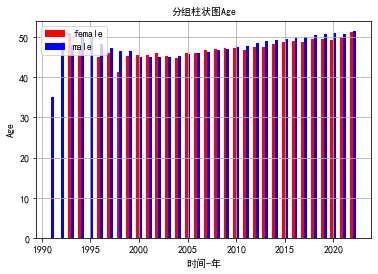

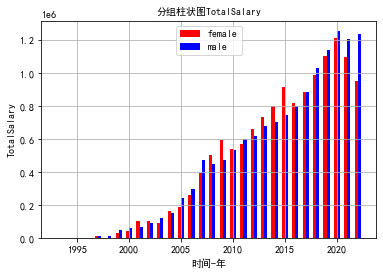

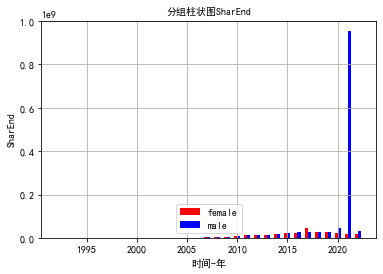

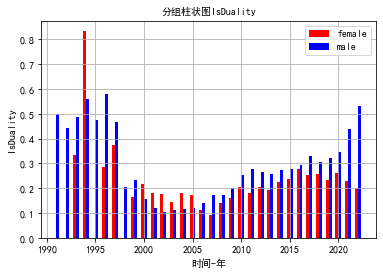

In [49]:
grouped_way=df.groupby(['Year','Female'])
mean_by_year=grouped_way.mean()
mean_by_year=mean_by_year.reset_index()

for i in mean_by_year[['Age','TotalSalary','SharEnd', 'IsDuality']]:
    Save_Path=Path+"Group_Hist"+i+".png"
    Title_name='分组柱状图'+i
    plt.xlabel('时间-年')
    plt.ylabel(i)
    plt.title(Title_name, fontsize=10)
    x1=mean_by_year[mean_by_year.Female==1].Year-0.15
    x2=mean_by_year[mean_by_year.Female==0].Year+0.15
    y1=mean_by_year[mean_by_year.Female==1][i]
    y2=mean_by_year[mean_by_year.Female==0][i]
    plt.bar(x1,y1,color='r',width=0.3,label='female')
    plt.bar(x2,y2,color='b',width=0.3,label='male')
    plt.legend()
    plt.grid() #显示网格线
    plt.show()

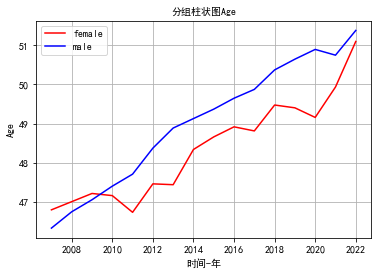

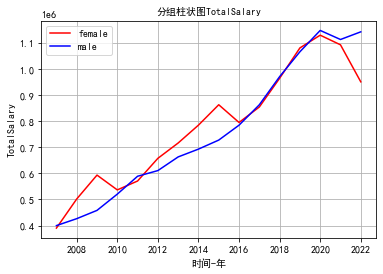

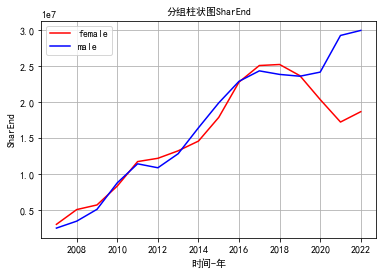

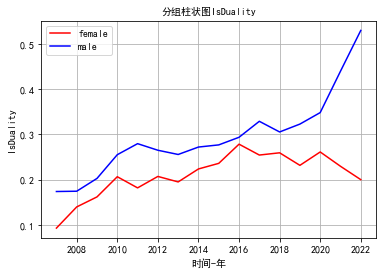

In [56]:

grouped_way=df.groupby(['Year','Female'])
mean_by_year=grouped_way.mean()
mean_by_year=mean_by_year.reset_index()
Condition=(mean_by_year.Year <=2006) #这里加不加括号都行，加了括号方便理解月度
index_condition = mean_by_year[Condition].index.tolist()
mean_by_year=mean_by_year.drop(index_condition) #删除2008年以前的

for i in mean_by_year[['Age','TotalSalary','SharEnd', 'IsDuality']]:
    Save_Path=Path+"Group_Hist"+i+".png"
    Title_name='分组柱状图'+i
    plt.xlabel('时间-年')
    plt.ylabel(i)
    plt.title(Title_name, fontsize=10)
    x1=mean_by_year[mean_by_year.Female==1].Year
    x2=mean_by_year[mean_by_year.Female==0].Year
    y1=mean_by_year[mean_by_year.Female==1][i]
    y2=mean_by_year[mean_by_year.Female==0][i]
    plt.plot(x1,y1,color='r',label='female')
    plt.plot(x2,y2,color='b',label='male')
    plt.legend()
    plt.grid() #显示网格线
    plt.show()